# $z$-anonymity model

This notebook shows the implementation of the $z$-anonymity model as described in the paper **$z$-anonymity: Zero-Delay Anonymization for Data Streams** currently under evaluation at IEEE Transactions on Knowledge and Data Engineering.

The model can be created as an instance of the class ```zanon_model``` defined in the file ```zanon_model.py```.

Using the model, figures are created to study how $z$-anonymity behaves and which performance it guarantees with respect to $k$-anonymity.

## Imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from zanon_model import zanon_model as zm
import matplotlib as mpl

mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['font.size'] = 15
mpl.rcParams['text.latex.preamble'] = r'\usepackage{mathptmx}'

## The model

Let us run an instance of the model as an example:

In [2]:
model = zm(z = 150, dt = 2, U = 5000, A = 20, k = 2, theta1 = 1, theta2 = .1, lambda0 = .2)

The model provides an interface to query the different probabilities that are defined in it. In the following, we will show how to access these probabilities and other useful parameters to understand the behaviour of $z$-anonymity.

### Exposing rate

We can query the input exposing rate $\lambda_a$ probabilities for each attribute, which describes the average number of times a user in the system exposes an attribute $a$. Note that attributes are ordered from the most popular to the least one. Alternatively, the attributes can be provided at initialization time.

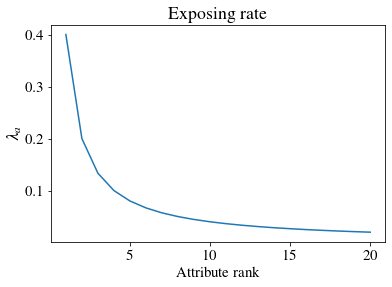

In [3]:
plt.figure()
plt.title('Exposing rate')
plt.xlabel('Attribute rank')
plt.ylabel('$\lambda_a$')
plt.plot(range(1, 21), model.get_l())
plt.show()

### Exposing probability

We can also show the probability of a user exposing at least once an attribute $a$ in $\Delta t$. In the model, we define this probability as $p_a^X$.

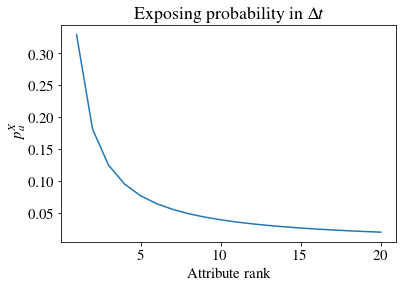

In [4]:
plt.figure()
plt.title('Exposing probability in $\Delta t$')
plt.xlabel('Attribute rank')
plt.ylabel('$p_a^X$')
plt.plot(range(1, 21), model.get_px())
plt.show()

### Publishing probability when exposed

If an attribute $a$ is exposed, it may be publishd as a tuple $(t, u, a)$, describing that at time $t$ the user $u$ has exposed the attribute $a$. This tuple is published only if $a$ has been exposed at least by $z-1$ other user in the past $\Delta t$. This conditions is satisfied with a probability $p_a^O$.

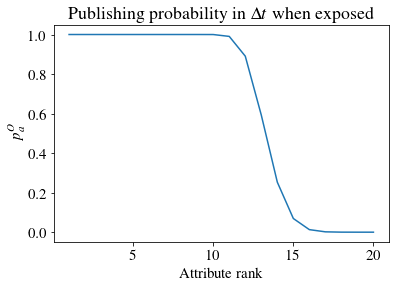

In [5]:
plt.figure()
plt.title('Publishing probability in $\Delta t$ when exposed')
plt.xlabel('Attribute rank')
plt.ylabel('$p_a^O$')
plt.plot(range(1, 21), model.get_po())
plt.show()

Also, the *a priori* probability that an attribute will be published in $\Delta t$ can be evaluated

### *A priori* publishing probability

Finally, each user has a probability of publishing an attribute $a$ in the time period $\Delta t$. In the model, we define it as $p_a^Y$. This probability is the product between the probability of been exposed and the probability of been published, when exposed.

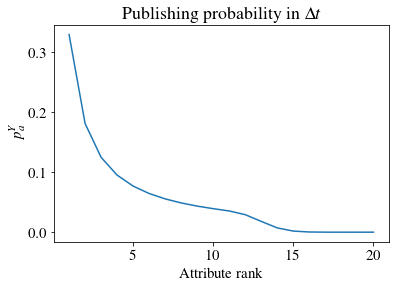

In [6]:
plt.figure()
plt.title('Publishing probability in $\Delta t$')
plt.xlabel('Attribute rank')
plt.ylabel('$p_a^Y$')
plt.plot(range(1, 21), model.get_py())
plt.show()

### Other attributes

There are other attributes that may help to understand what is going on inside the model. Here is a list and their values in the model that we instantiated:
- `Aeff`: $A_{eff}$, the number of effective attributes in the model;
- `pseq_star`: $\frac{\theta_2}{2^{A_{eff}}}$, the minimum realization probability to avoid pruning;
- `pseqs`: a list of all the $p_\bar{y}$ that satisfy the threshold $\frac{\theta_2}{2^{A_{eff}}}$;

In [7]:
print('Aeff: {}'.format(model.get_Aeff()))
print('pseq_star: {}'.format(model.get_pseq_star()))
print('Number of effective realizations: {}'.format(len(model.get_pseqs())))
print('Sum of effective realizations\' probabilities: {}'.format(sum(model.get_pseqs())))

Aeff: 16
pseq_star: 1.52587890625e-06
Number of effective realizations: 1587
Sum of effective realizations' probabilities: 0.998887579073921


### $p_{k-anon}$

Finally, we can compute the probability of one among the $U = 5000$ users to be $k$-anonymized.

In [8]:
print('p_kanon: {:.4f}'.format(model.get_pkanon()))

p_kanon: 0.9710
